# Sensitivity Study

In [7]:
import pickle;
import graph;
import nstools;
import matplotlib.pyplot as plt;
import glob;
import numpy as np;
from regionlib import brasil;
;

''

# 1) Sensitivity to removal of mixing terms

In [5]:
with open("data/small-sens/small-sens/nomix.pickle-small.pickle","rb") as f:
    nomix, _, meta = pickle.load(f)
    
nstools.prettySummary(nomix,meta)

Reference level: 2000 | Upper Bound: 1000 | Lower Bound: 4000
mixing: False
Condition: 226.35284200159282 | Error: 2695.9738061604994
Morris et al. mixing budgets
Zenk 1999 Blend: 2.748e-04	2.801e-04	3.270e-04
Zenk 1993 Blend: 2.516e-04	2.653e-04	3.240e-04


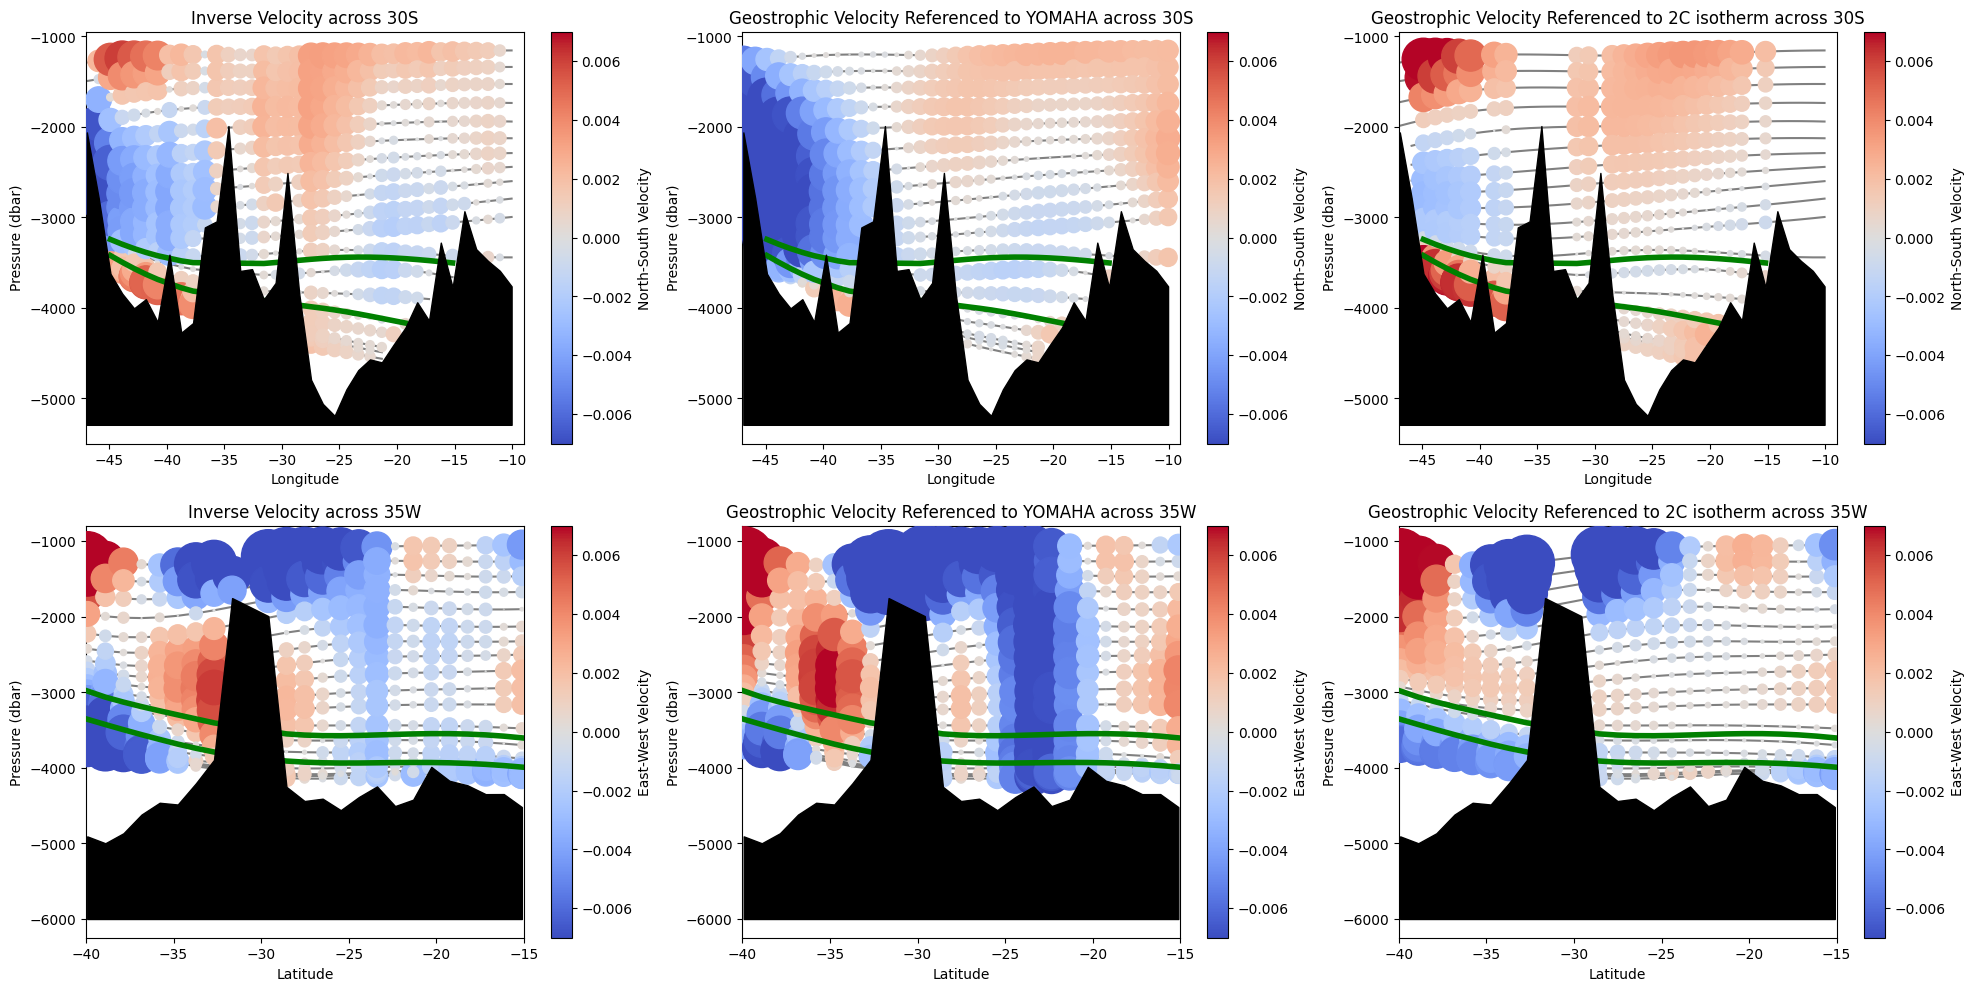

In [6]:
# Next we can recreate the "bubble plot from FH21

graph.bubblePlot(nomix,-35,-30)


# 2.) Sensitivity to initial reference surface.

Condition increases by order of magnitude after the 3200 dbar surface due to the Mid Atlantic Ridge seperating the eastern part of the domain from the western part at this depth.

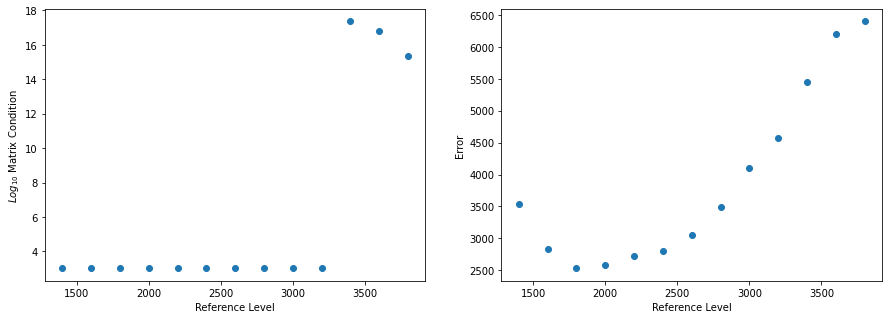

In [5]:
levels = []
conditions = []
errors = []
for fname in glob.glob("data/small-sens/small-sens/reflevel/*"):    
    with open(fname,"rb") as f:
        meta = pickle.load(f)[2]
        conditions.append(meta["condition"])
        errors.append(meta["error"])
        levels.append(meta["reflevel"])
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.scatter(levels,np.log10(conditions))
ax1.set_xlabel("Reference Level")
ax1.set_ylabel("$Log_{10}$ Matrix Condition")
ax2.scatter(levels,errors)
ax2.set_xlabel("Reference Level")
ax2.set_ylabel("Error")
plt.show()

## Inverse solution referenced to 1400 dbar

Reference level: 1400 | Upper Bound: 1000 | Lower Bound: 4000
mixing: False
Condition: 1028.3640283750751 | Error: 3533.938473527853
Morris et al. mixing budgets
Zenk 1999 Blend: 2.637e-04	2.748e-04	3.270e-04
Zenk 1993 Blend: 2.297e-04	2.510e-04	3.090e-04


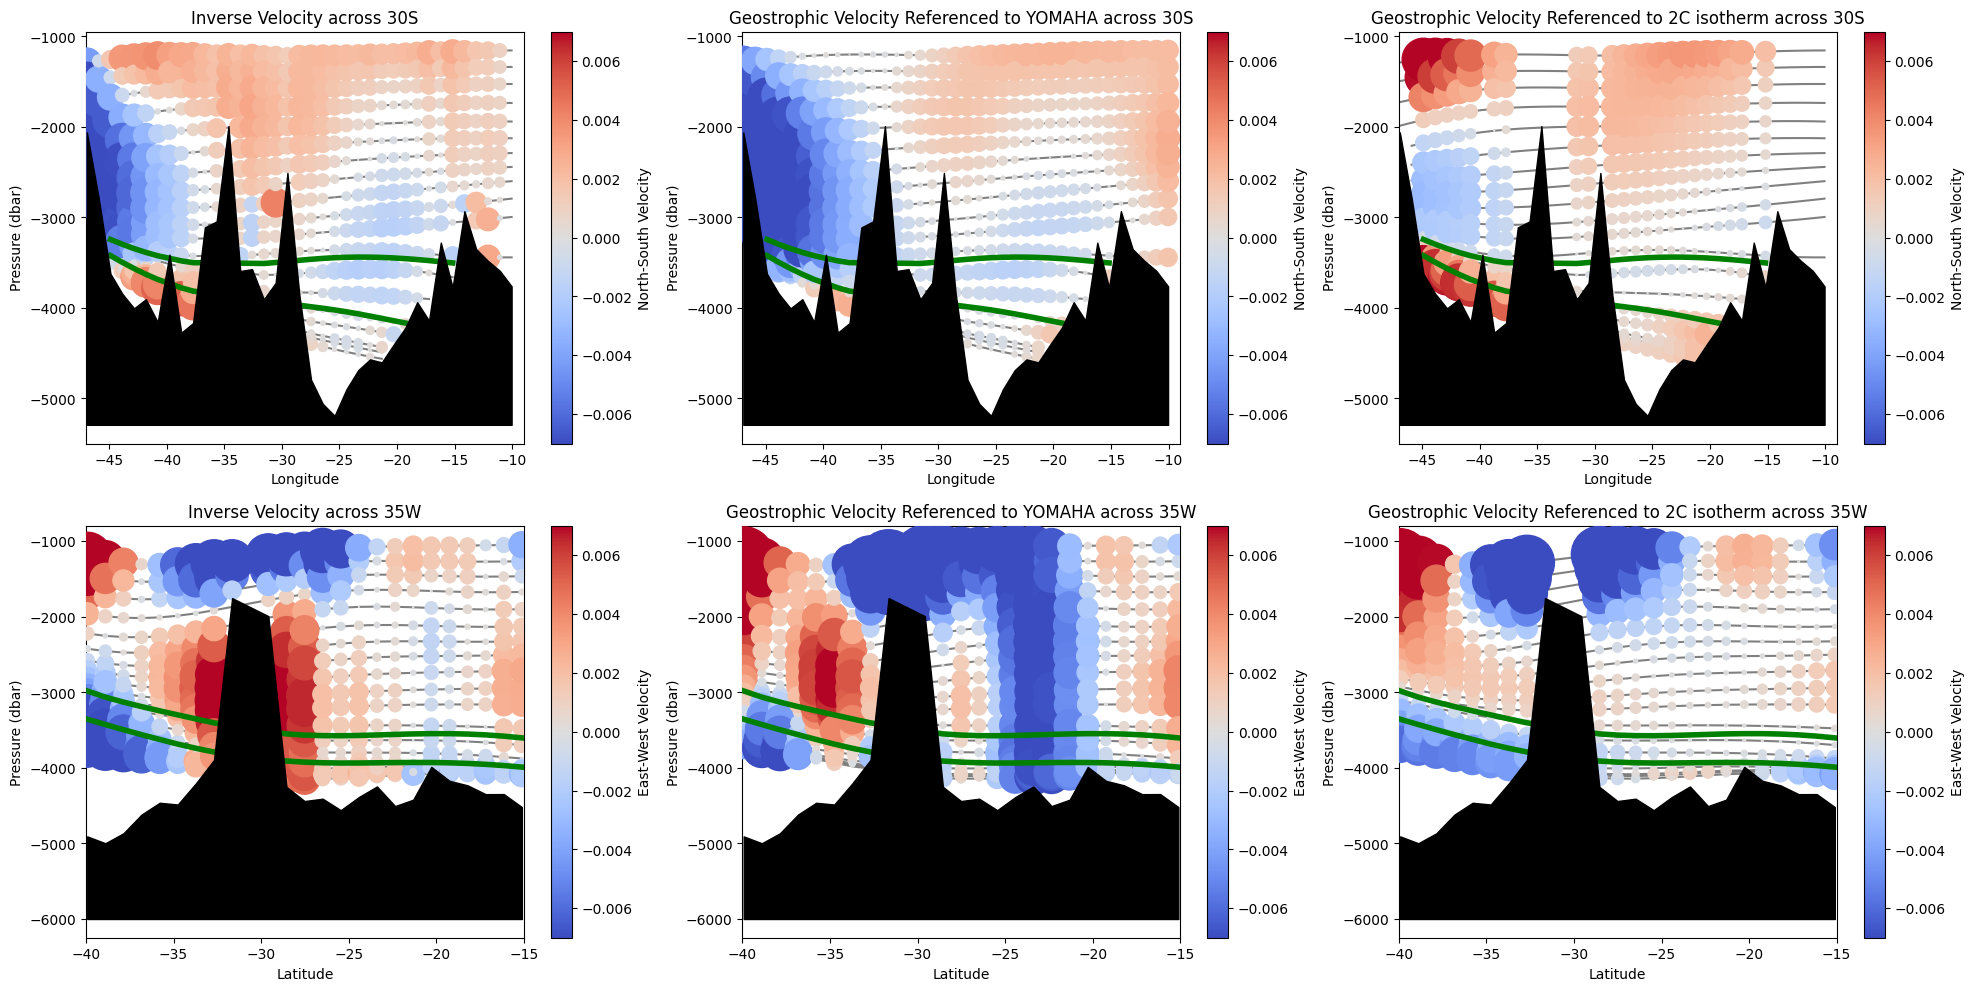

In [7]:

with open("data/small-sens/small-sens/reflevel/1400.pickle-small.pickle","rb") as f:
    surf = pickle.load(f)
                        
nstools.prettySummary(surf[0],surf[2])
graph.bubblePlot(surf[0],-35,-29.5)


    
## Inverse solution referenced to 3200 dbar

Reference level: 3200 | Upper Bound: 1000 | Lower Bound: 4000
mixing: False
Condition: 1028.31328287914 | Error: 4579.6008533947825
Morris et al. mixing budgets
Zenk 1999 Blend: 2.737e-04	2.793e-04	3.270e-04
Zenk 1993 Blend: 2.447e-04	2.608e-04	3.193e-04


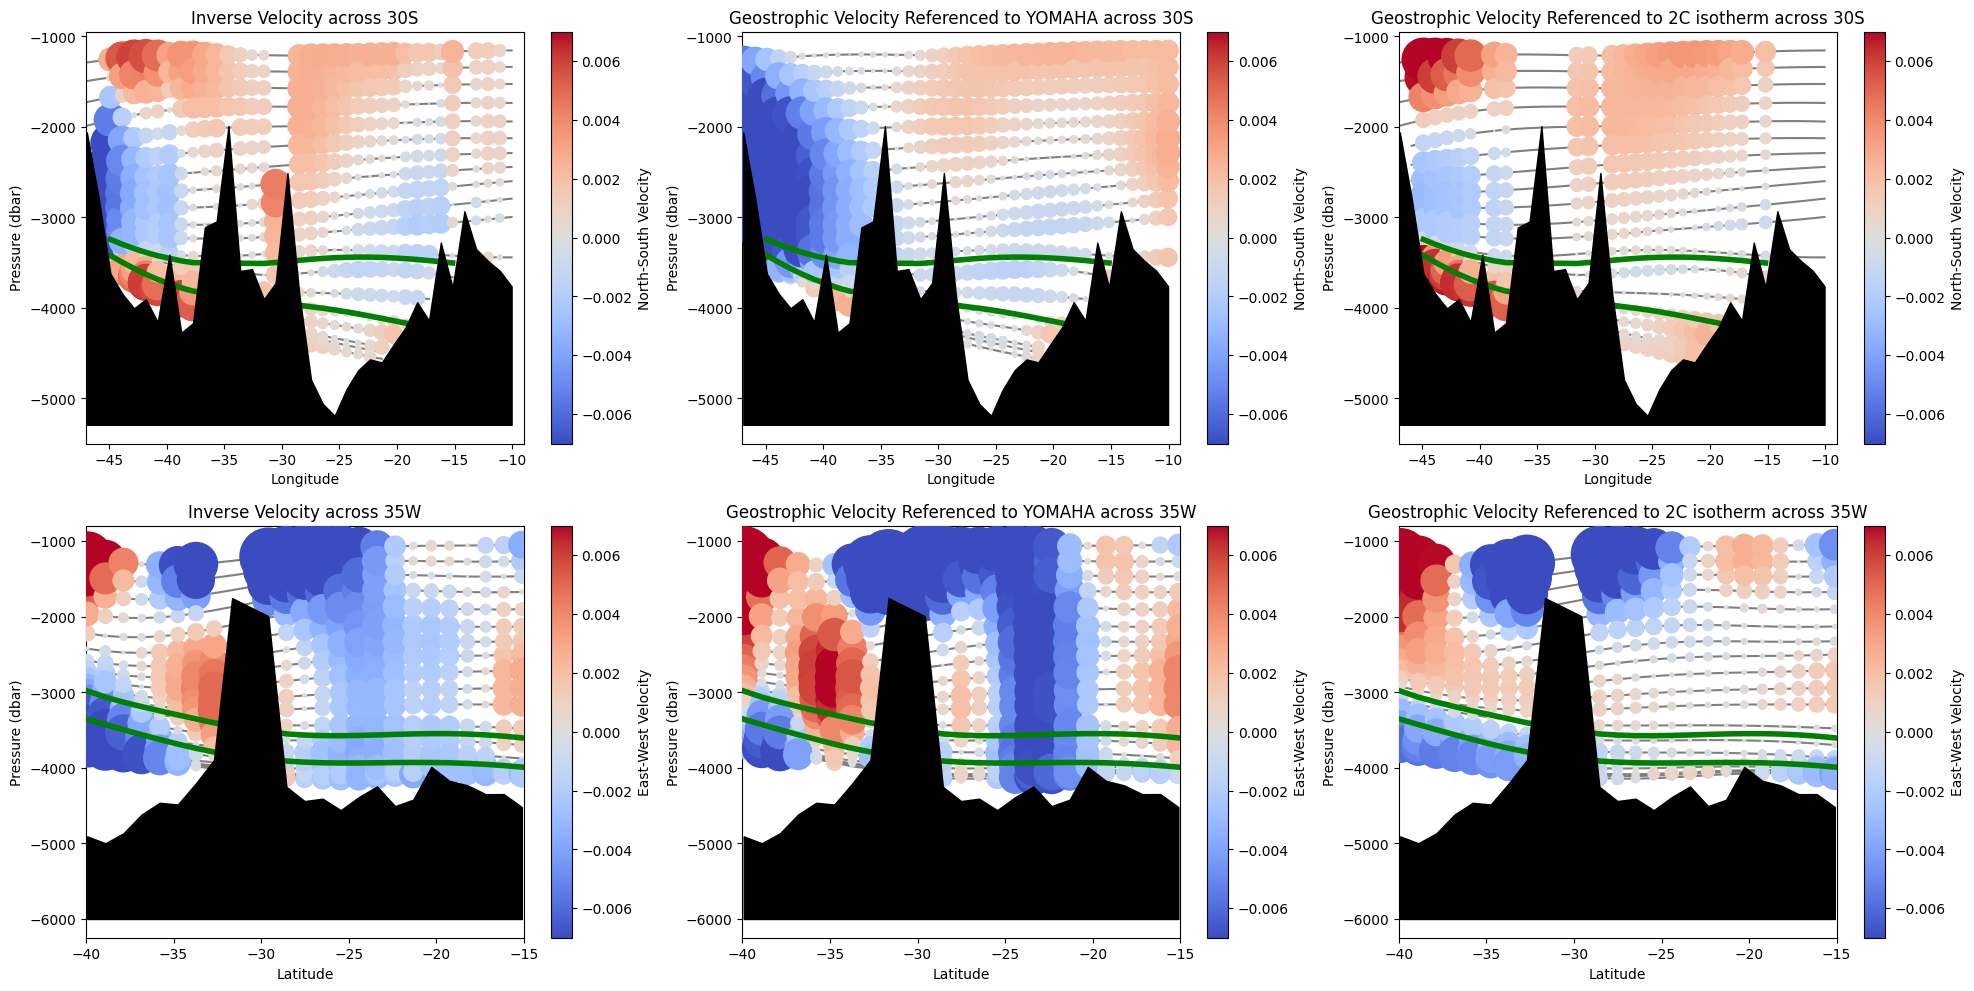

In [10]:

with open("data/small-sens/small-sens/reflevel/3200.pickle-small.pickle","rb") as f:
    surf = pickle.load(f)
    
nstools.prettySummary(surf[0],surf[2])
graph.bubblePlot(surf[0],-35,-29.5)



# 3.) Sensitivity to Gaussian noise added to calculated neutral buoyant depths (pre-interpolation).

## Noise with Standard deviation of 30 dbar

Reference level: 2000 | Upper Bound: 1000 | Lower Bound: 4000
mixing: False
Condition: 1397.1525121408547 | Error: 2588.1428606672
Morris et al. mixing budgets
Zenk 1999 Blend: 2.739e-04	2.791e-04	3.270e-04
Zenk 1993 Blend: 2.415e-04	2.587e-04	3.171e-04


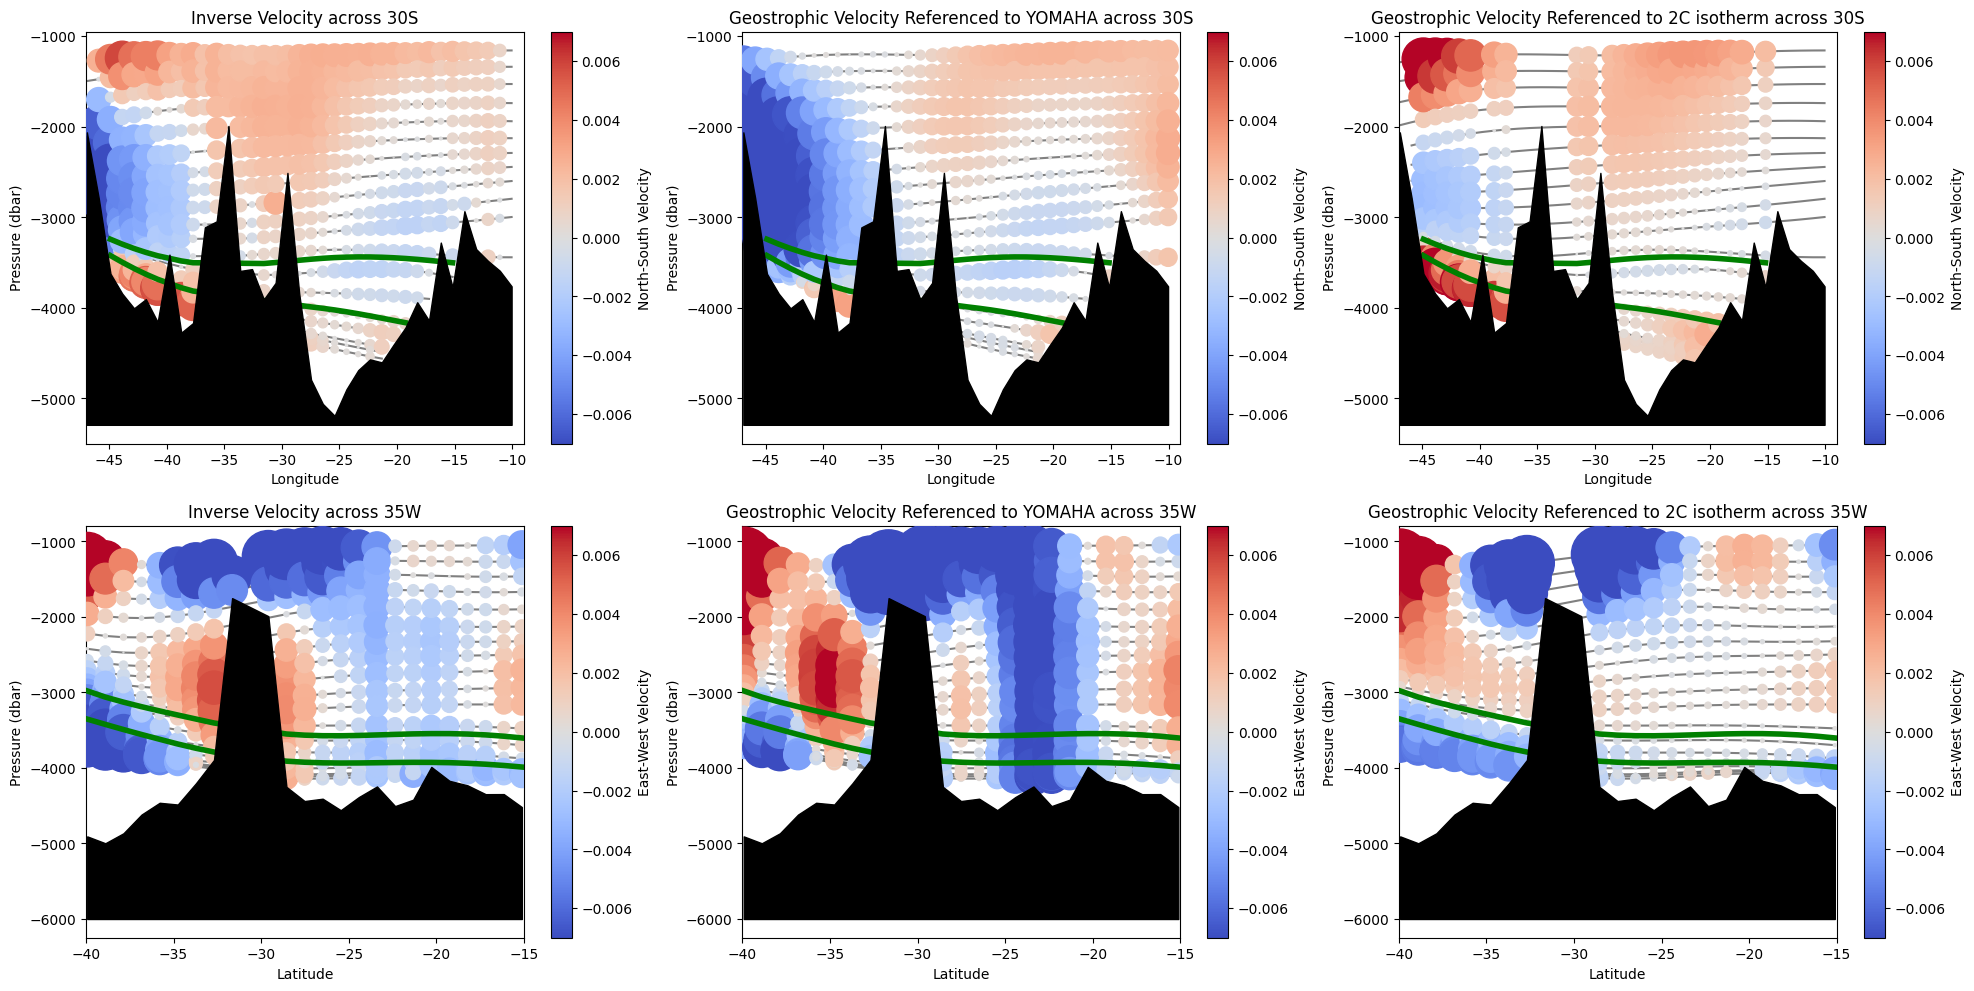

In [17]:

with open("data/small-sens/small-sens/noise-30.pickle-small.pickle","rb") as f:
    noise30 = pickle.load(f)
nstools.prettySummary(noise30[0],noise30[2])
graph.bubblePlot(noise30[0],-35,-29.5)


## Noise with Standard deviation of 90 dbar

Reference level: 2000 | Upper Bound: 1000 | Lower Bound: 4000
mixing: False
Condition: 862.4028186010887 | Error: 2463.0620230784825
Morris et al. mixing budgets
Zenk 1999 Blend: 2.686e-04	2.779e-04	3.270e-04
Zenk 1993 Blend: 2.387e-04	2.568e-04	3.152e-04


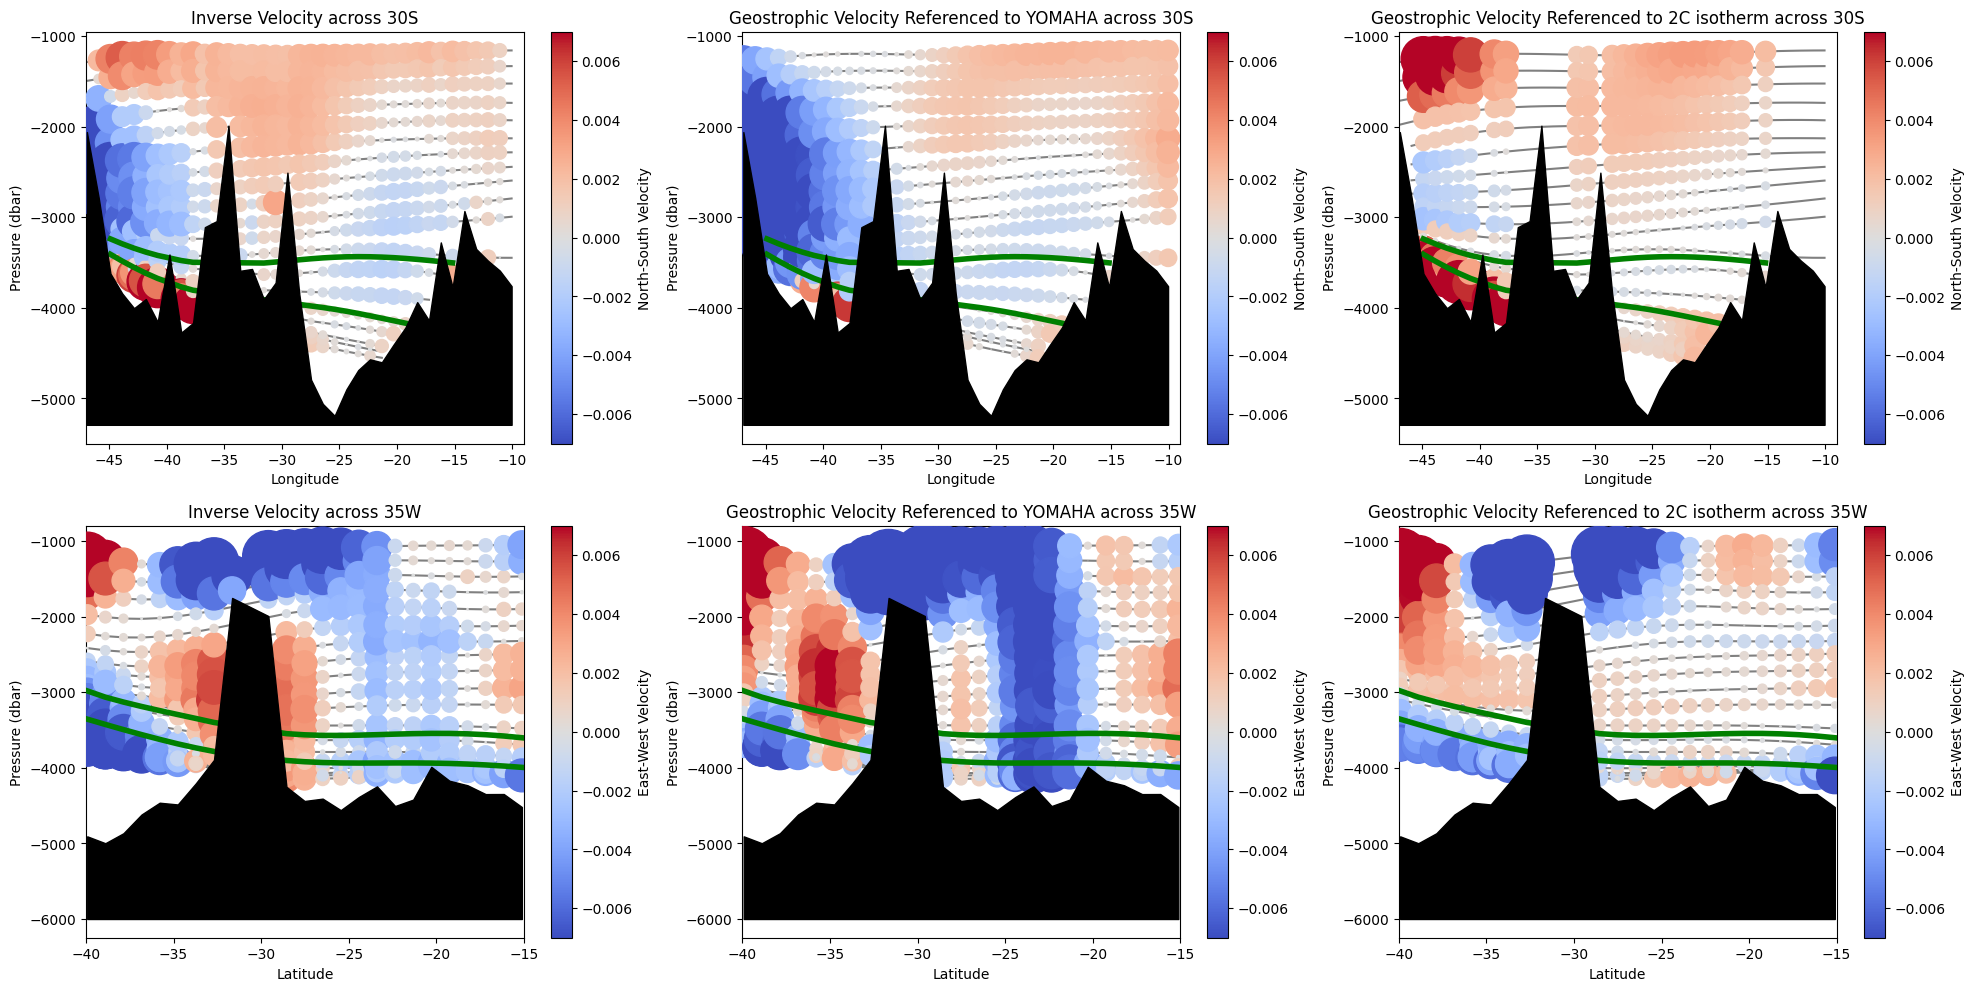

In [14]:
## Guassian noise with a standard deviation of 90 added.
with open("data/small-sens/small-sens/noise-90.pickle-small.pickle","rb") as f:
    noise90 = pickle.load(f)
nstools.prettySummary(noise90[0],noise90[2])
graph.bubblePlot(noise90[0],-35,-29.5)
## Guassian noise with a standard deviation of 30 added.

## Difference along surfaces between surfaces with 90 dBar standard deviation of noise added and those without (post-interpolation)

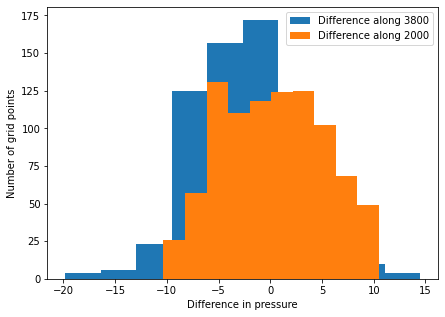

In [25]:
with open("data/small-sens/small-sens/nomix.pickle-small.pickle","rb") as f:
    nomix = pickle.load(f)[0]
# We can directly subtract these arrays because they are on the same grid. This isn't necessarily true if your two surfaces objects differ in that respect
fig, ax = plt.subplots(figsize=(7,5))
ax.hist(noise90[0][3800]["data"]["pres"]-nomix[3800]["data"]["pres"],label="Difference along 3800")
ax.hist(noise90[0][2000]["data"]["pres"]-nomix[2000]["data"]["pres"],label="Difference along 2000")
ax.set_xlabel("Difference in pressure")
ax.set_ylabel("Number of grid points")
ax.legend()
plt.show()

# 4) Sensitivity to  bottom roughness decay scale

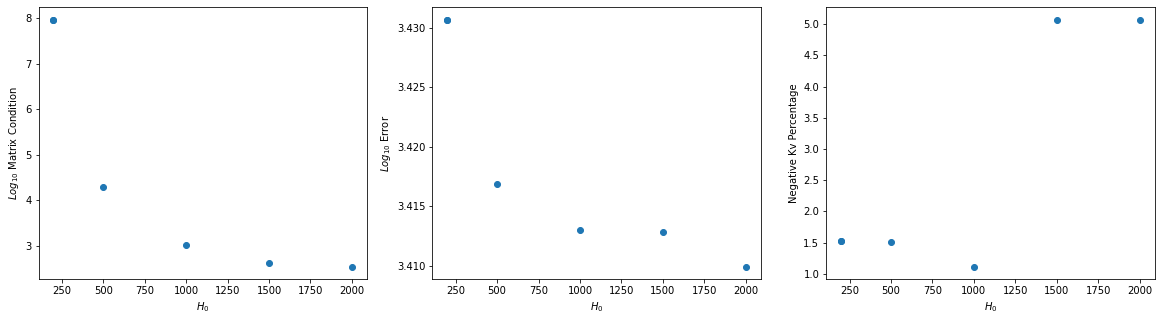

In [2]:
decays = []
conditions = []
errors= []
negatives = []
for fname in glob.glob("data/small-sens/small-sens/H_0/*"):    
    with open(fname,"rb") as f:
        surf = pickle.load(f)
        meta = surf[2]
        conditions.append(meta["condition"])
        errors.append(meta["error"])
        decays.append(meta["H_0"])
        negatives.append(nstools.negativeDiffusivities(surf[0]))
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20,5))
ax1.scatter(decays,np.log10(conditions))
ax1.set_xlabel("$H_{0}$")
ax1.set_ylabel("$Log_{10}$ Matrix Condition")
ax2.scatter(decays,np.log10(errors))
ax2.set_ylabel("$Log_{10}$ Error")
ax2.set_xlabel("$H_{0}$")
ax3.scatter(decays,negatives)
ax3.set_xlabel("$H_{0}$")
ax3.set_ylabel("Negative Kv Percentage")

plt.show()

## Roughness  scale of 500 dBar

Reference level: 2000 | Upper Bound: 1000 | Lower Bound: 4000
mixing: False
Condition: 20196.47696813807 | Error: 2611.1657329965487
Morris et al. mixing budgets
Zenk 1999 Blend: 2.715e-04	2.783e-04	3.270e-04
Zenk 1993 Blend: 2.403e-04	2.579e-04	3.163e-04


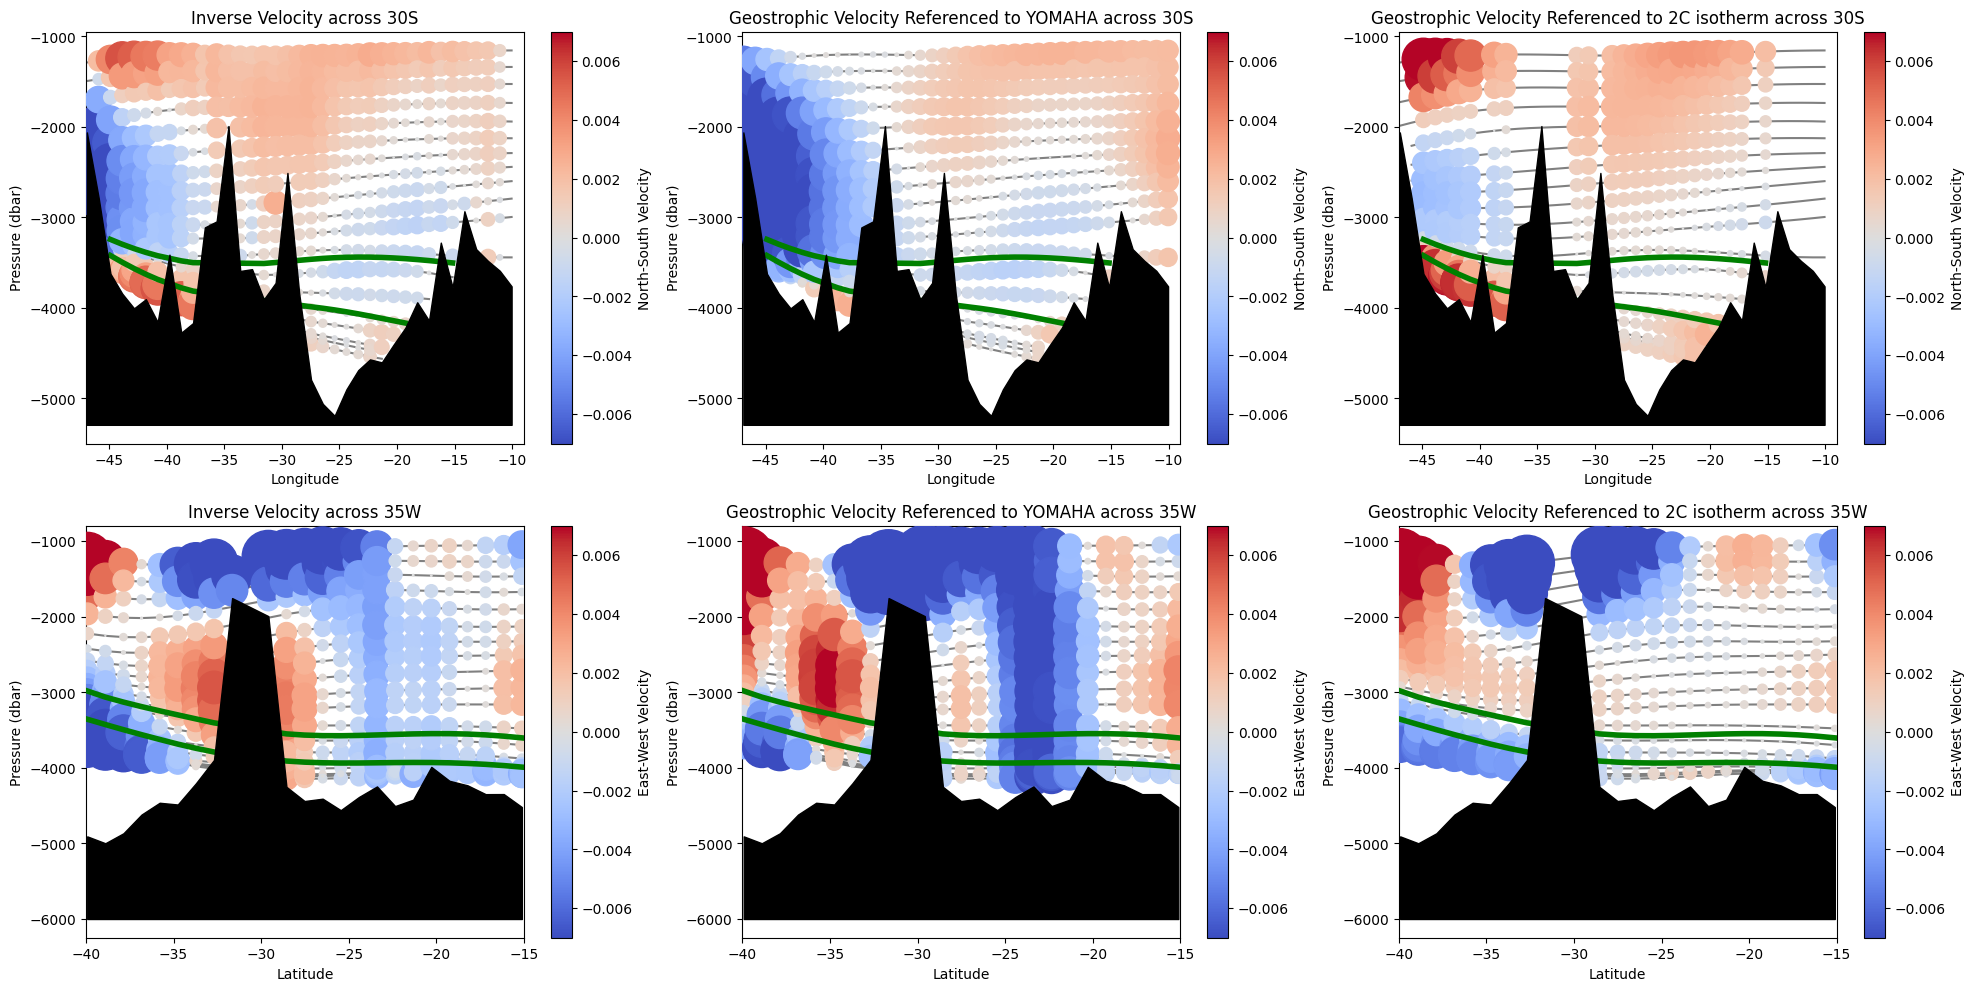

In [13]:
with open("data/small-sens/small-sens/H_0/500.pickle-small.pickle","rb") as f:
    surf = pickle.load(f)
nstools.prettySummary(surf[0],surf[2])
graph.bubblePlot(surf[0],-35,-29.5)


## Roughness  scale of 2000 dBar

Reference level: 2000 | Upper Bound: 1000 | Lower Bound: 4000
mixing: False
Condition: 352.1865778864097 | Error: 2569.962717088747
Morris et al. mixing budgets
Zenk 1999 Blend: 2.736e-04	2.792e-04	3.270e-04
Zenk 1993 Blend: 2.457e-04	2.615e-04	3.200e-04


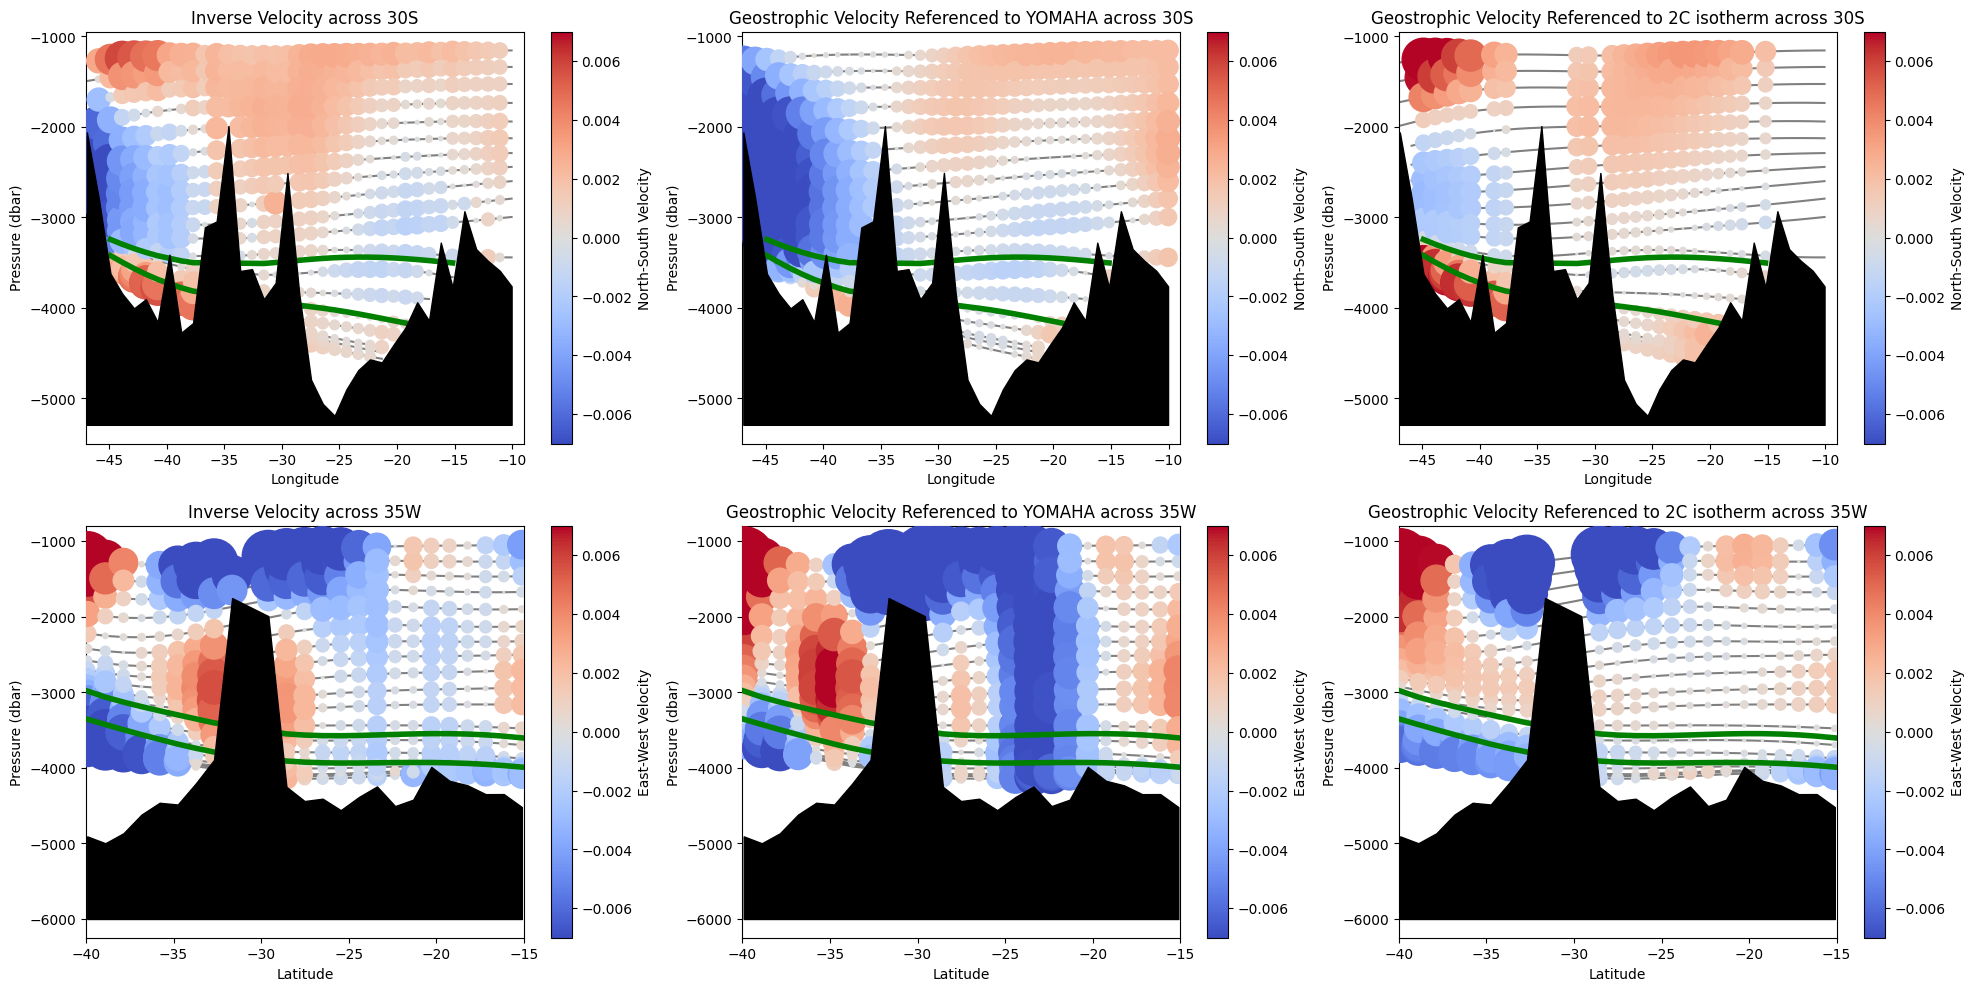

In [11]:
with open("data/small-sens/small-sens/H_0/2000.pickle-small.pickle","rb") as f:
    surf = pickle.load(f)
nstools.prettySummary(surf[0],surf[2])
graph.bubblePlot(surf[0],-35,-29.5)



# 4) Sensitivity to including fewer surfaces

## Changes in error and condition

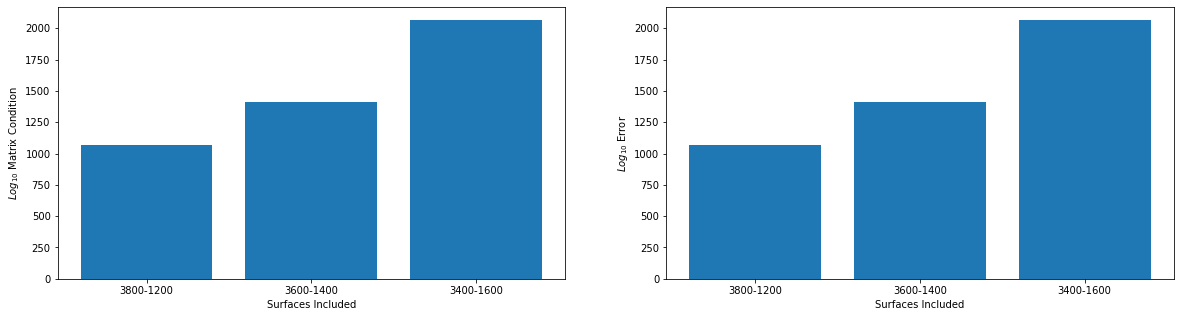

In [25]:
labels = []
conditions = []
errors= []
for fname in glob.glob("data/small-sens/small-sens/bounds*"):    
    with open(fname,"rb") as f:
        surf = pickle.load(f)
        meta = surf[2]
        conditions.append(meta["condition"])
        errors.append(meta["error"])
        labels.append(fname[-29:-20])
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
x = range(len(conditions))
ax1.bar(x,conditions)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_xlabel("Surfaces Included")
ax1.set_ylabel("$Log_{10}$ Matrix Condition")
ax2.bar(range(len(errors)),conditions)
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_xlabel("Surfaces Included")
ax2.set_ylabel("$Log_{10}$ Error")
#ax2.set_xlabel("$H_{0}$")

plt.show()

## Circulation including surfaces from 3800 to 1200 (note: Run 0 uses 1000-4000)

Reference level: 2000 | Upper Bound: 1200 | Lower Bound: 3800
mixing: False
Condition: 1071.9161216033904 | Error: 1880.6672962644016
Morris et al. mixing budgets
Zenk 1999 Blend: 2.717e-04	2.784e-04	3.270e-04
Zenk 1993 Blend: 2.410e-04	2.583e-04	3.167e-04


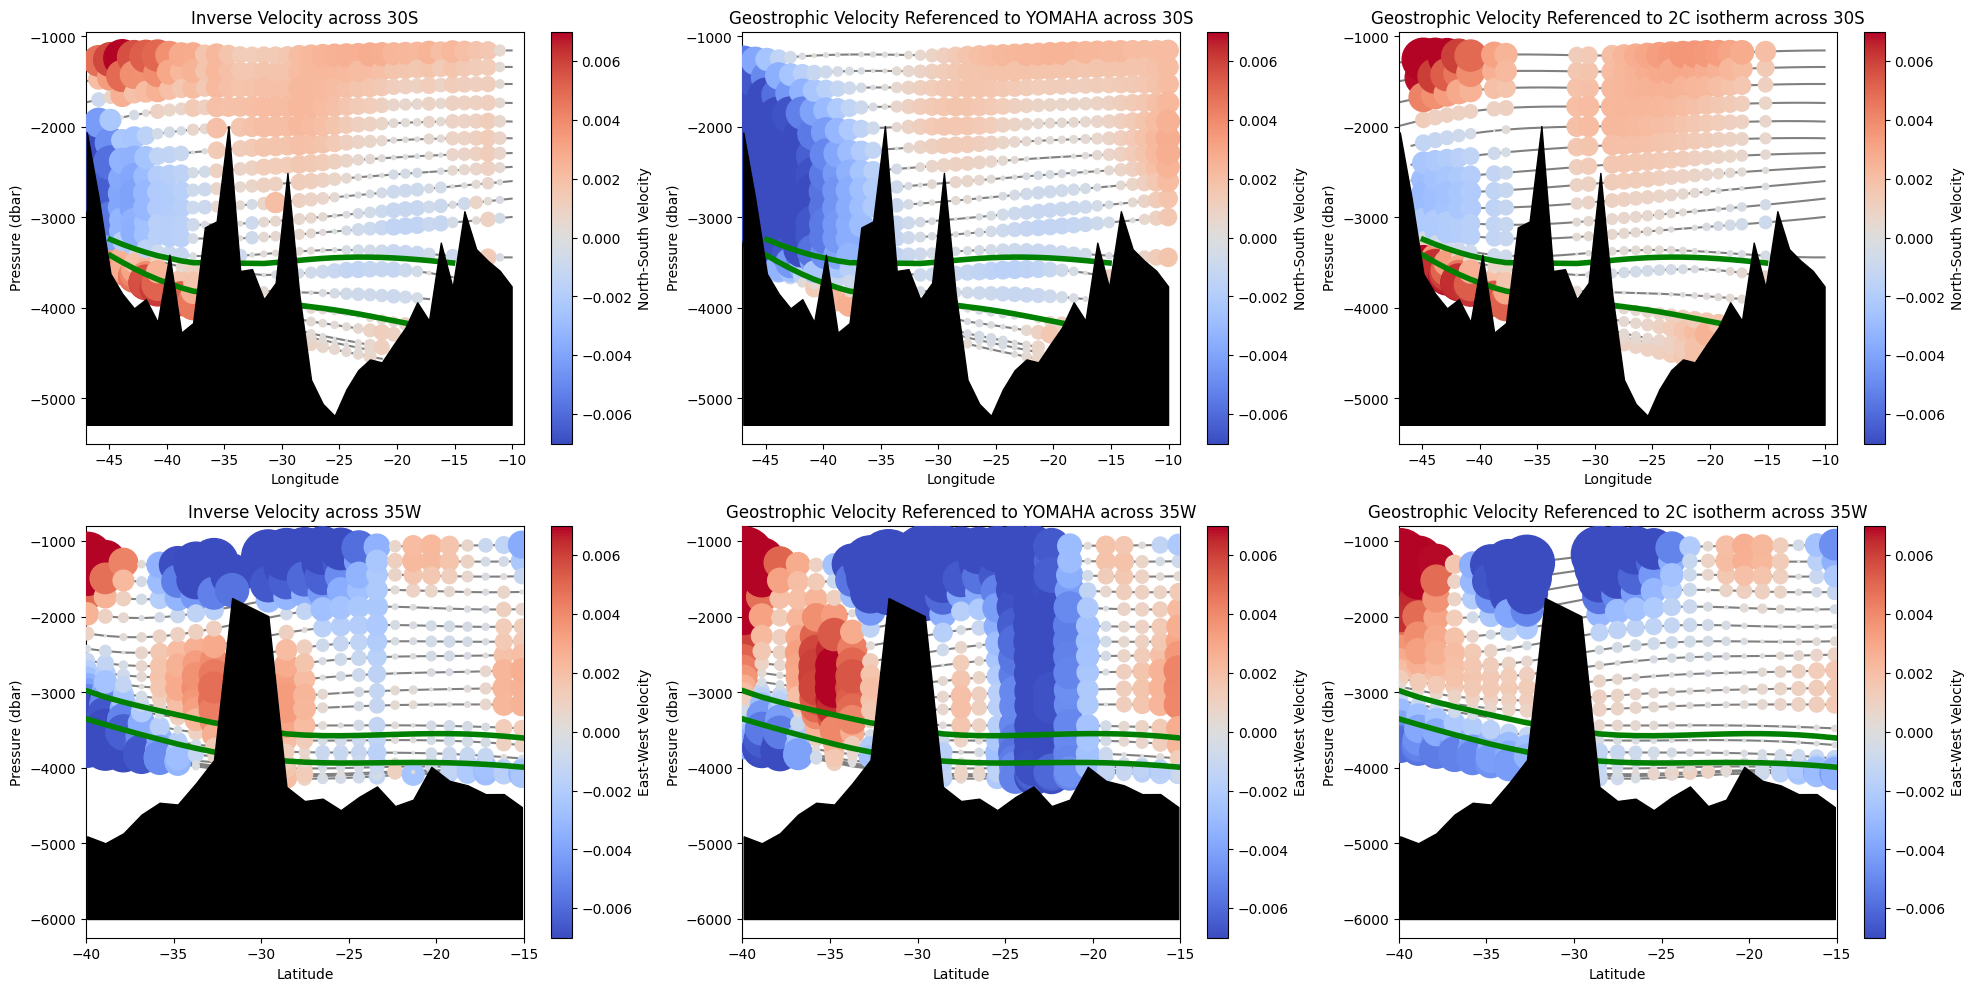

In [28]:
with open("data/small-sens/small-sens/bounds3800-1200.pickle-small.pickle","rb") as f:
    surf = pickle.load(f)
nstools.prettySummary(surf[0],surf[2])
graph.bubblePlot(surf[0],-35,-29.5)


## Circulation including surfaces from 3400 to 1600 (note: Run 0 uses 1000-4000)

Reference level: 2000 | Upper Bound: 1600 | Lower Bound: 3400
mixing: False
Condition: 2066.3311370206993 | Error: 908.6501488484263
Morris et al. mixing budgets
Zenk 1999 Blend: 2.669e-04	2.764e-04	3.270e-04
Zenk 1993 Blend: 2.299e-04	2.511e-04	3.092e-04


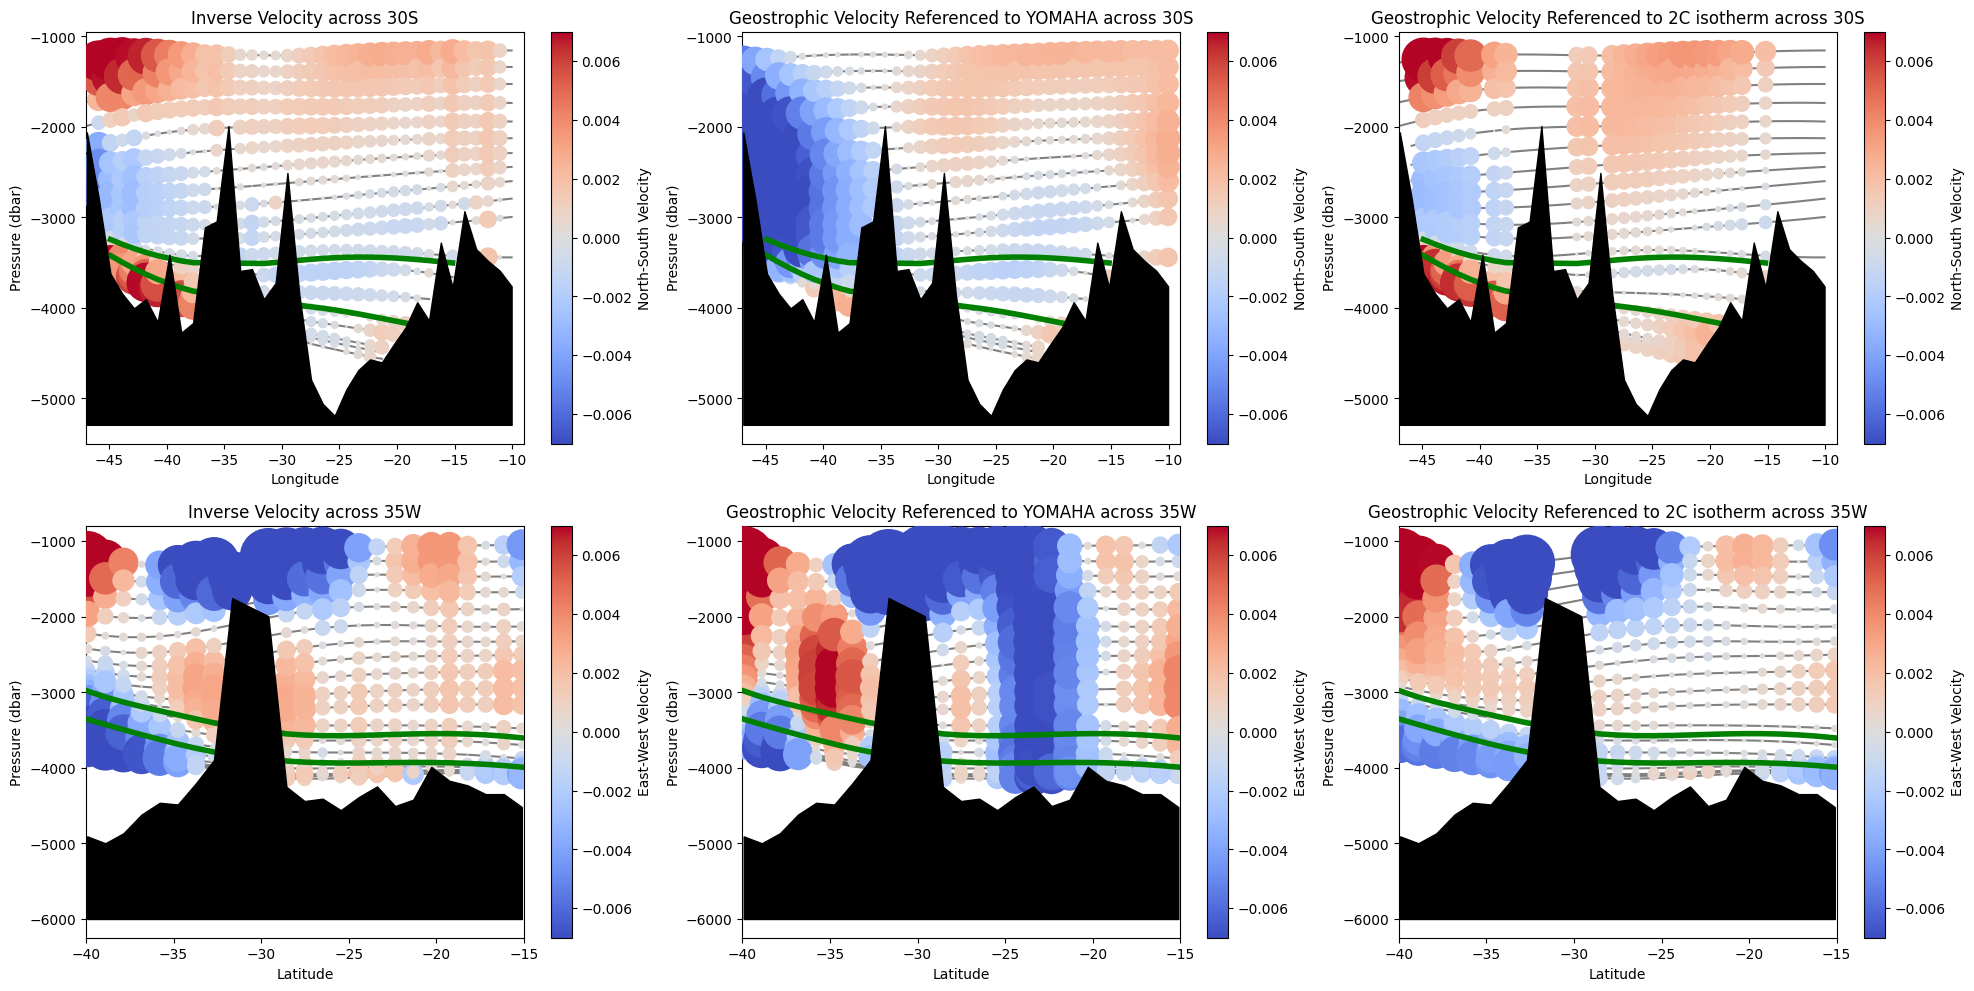

In [27]:
with open("data/small-sens/small-sens/bounds3400-1600.pickle-small.pickle","rb") as f:
    surf = pickle.load(f)
nstools.prettySummary(surf[0],surf[2])
graph.bubblePlot(surf[0],-35,-29.5)

# 4) Sensitivity to mixing column weighting

## Sensitivity to change in $Kv_0$

Text(0, 0.5, 'Error')

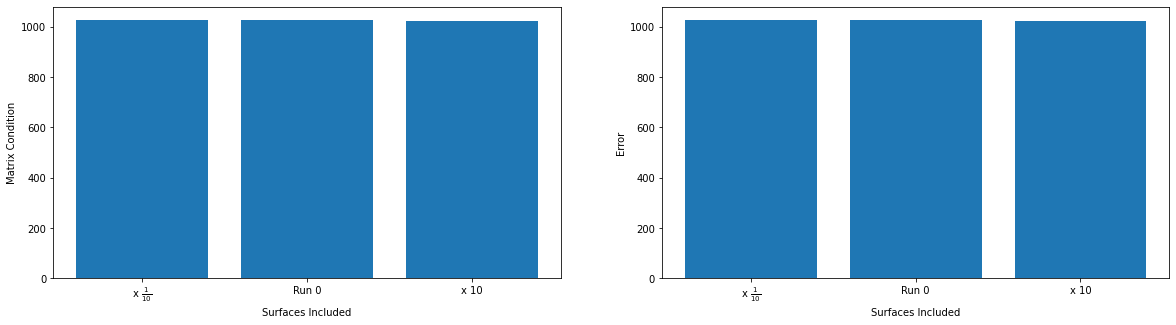

In [50]:
conditions = []
errors = []
with open("data/small-sens/small-sens/columnweighting--1-0-0.pickle-small.pickle","rb") as f:
    surf = pickle.load(f)
    conditions.append(surf[2]["condition"])
    errors.append(surf[2]["error"])
with open("data/run0/invertedbrasil.pickle","rb") as f:
    surf = pickle.load(f)
    conditions.append(surf[0]["metadata"]["condition"])
    errors.append(surf[0]["metadata"]["error"])
with open("data/small-sens/small-sens/columnweighting-1-0-0.pickle-small.pickle","rb") as f:
    surf = pickle.load(f)
    conditions.append(surf[2]["condition"])
    errors.append(surf[2]["error"])
    #nstools.prettySummary(surf[0],surf[2])
    #graph.bubblePlot(surf[0],-35,-29.5)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
x = range(len(conditions))
ax1.bar(x,conditions)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_xlabel("Surfaces Included")
ax1.set_ylabel("Matrix Condition")
ax2.bar(range(len(errors)),conditions)
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_xlabel("Surfaces Included")
ax2.set_ylabel("Error")
#ax2.set_xlabel("$H_{0}$")

## Sensitivity to change in $Kv_b$

Text(0, 0.5, 'Error')

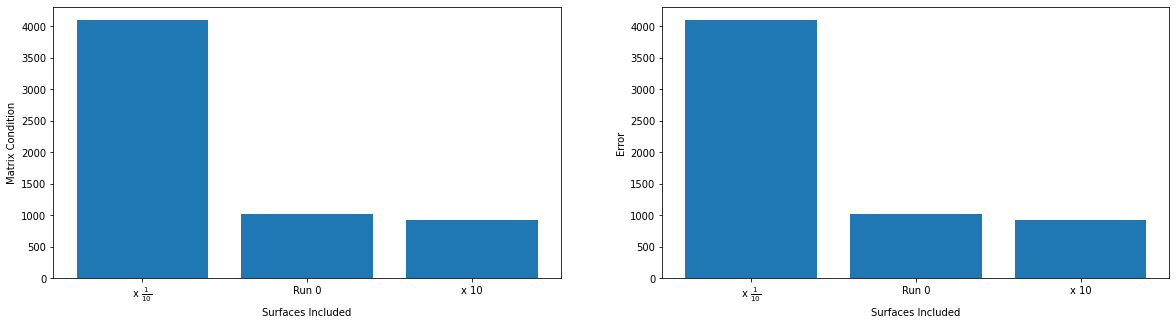

In [51]:
conditions = []
errors = []
with open("data/small-sens/small-sens/columnweighting-0--1-0.pickle-small.pickle","rb") as f:
    surf = pickle.load(f)
    conditions.append(surf[2]["condition"])
    errors.append(surf[2]["error"])
with open("data/run0/invertedbrasil.pickle","rb") as f:
    surf = pickle.load(f)
    conditions.append(surf[0]["metadata"]["condition"])
    errors.append(surf[0]["metadata"]["error"])
with open("data/small-sens/small-sens/columnweighting-0-1-0.pickle-small.pickle","rb") as f:
    surf = pickle.load(f)
    conditions.append(surf[2]["condition"])
    errors.append(surf[2]["error"])
    #nstools.prettySummary(surf[0],surf[2])
    #graph.bubblePlot(surf[0],-35,-29.5)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
x = range(len(conditions))
ax1.bar(x,conditions)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_xlabel("Surfaces Included")
ax1.set_ylabel("Matrix Condition")
ax2.bar(range(len(errors)),conditions)
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_xlabel("Surfaces Included")
ax2.set_ylabel("Error")
#ax2.set_xlabel("$H_{0}$")

## Sensitivity to change in $K_h$

Text(0, 0.5, 'Error')

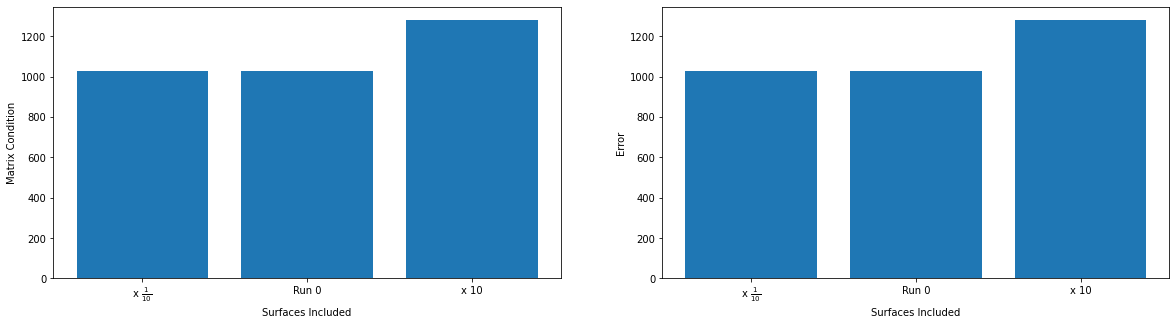

In [52]:
conditions = []
errors = []
with open("data/small-sens/small-sens/columnweighting-0-0--1.pickle-small.pickle","rb") as f:
    surf = pickle.load(f)
    conditions.append(surf[2]["condition"])
    errors.append(surf[2]["error"])
with open("data/run0/invertedbrasil.pickle","rb") as f:
    surf = pickle.load(f)
    conditions.append(surf[0]["metadata"]["condition"])
    errors.append(surf[0]["metadata"]["error"])
with open("data/small-sens/small-sens/columnweighting-0-0-1.pickle-small.pickle","rb") as f:
    surf = pickle.load(f)
    conditions.append(surf[2]["condition"])
    errors.append(surf[2]["error"])
    #nstools.prettySummary(surf[0],surf[2])
    #graph.bubblePlot(surf[0],-35,-29.5)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
x = range(len(conditions))
ax1.bar(x,conditions)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_xlabel("Surfaces Included")
ax1.set_ylabel("Matrix Condition")
ax2.bar(range(len(errors)),conditions)
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_xlabel("Surfaces Included")
ax2.set_ylabel("Error")
#ax2.set_xlabel("$H_{0}$")

# 5) Sensitivity to choosing a reference station at 24W, 22S

Reference level: 2000 | Upper Bound: 1000 | Lower Bound: 4000
mixing: False
Condition: 670.6017955885757 | Error: 2205.793747624185
Morris et al. mixing budgets
Zenk 1999 Blend: 2.572e-04	2.683e-04	3.270e-04
Zenk 1993 Blend: 2.506e-04	2.646e-04	3.233e-04


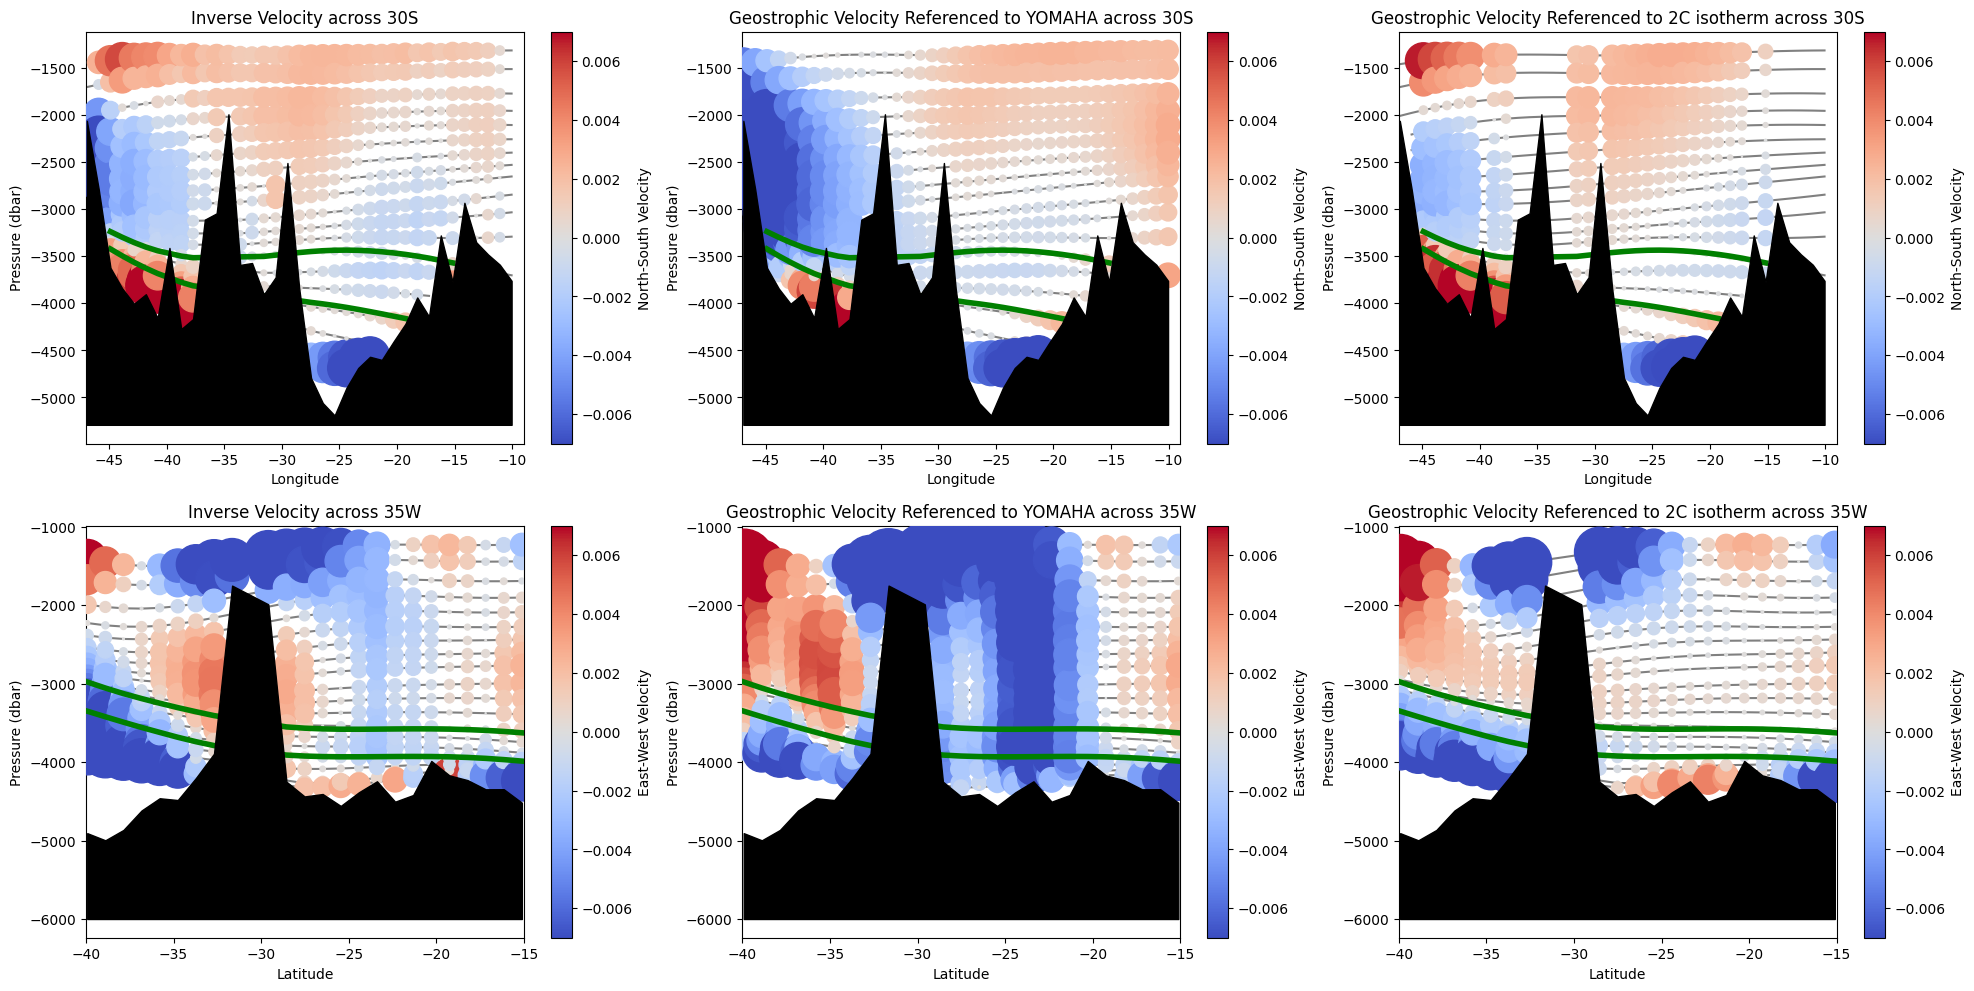

In [3]:
with open("data/small-sens/small-sens/differentref--24-22.pickle","rb") as f:
    surf = pickle.load(f)
nstools.prettySummary(surf[0],surf[2])
graph.bubblePlot(surf[0],-35,-29.5)